In [1]:
import numpy as np
import networkx as nx
import pandas as pd

## Analyse 2D data [Square Lattice]

In [3]:
psi_samples = pd.read_csv("../2d_mps/experiment_n_225_bdim_16/mps_samples.csv")

In [5]:
psi_samples.values

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]])

In [6]:
# Create a square lattice graph
G = nx.grid_2d_graph(15, 15)

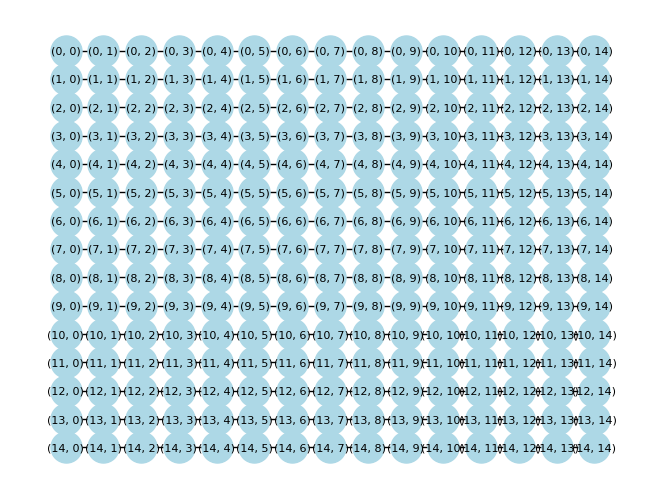

In [9]:
# Draw the graph
pos = {(x, y): (y, -x) for x, y in G.nodes()}  # Create a position dictionary for drawing



In [23]:
graph = nx.convert_node_labels_to_integers(G)

colored_nodes = np.where(psi_samples.values[1] == 1)[0]
node_colors = {node: 'red' if node in colored_nodes else 'blue' for node in graph.nodes()}

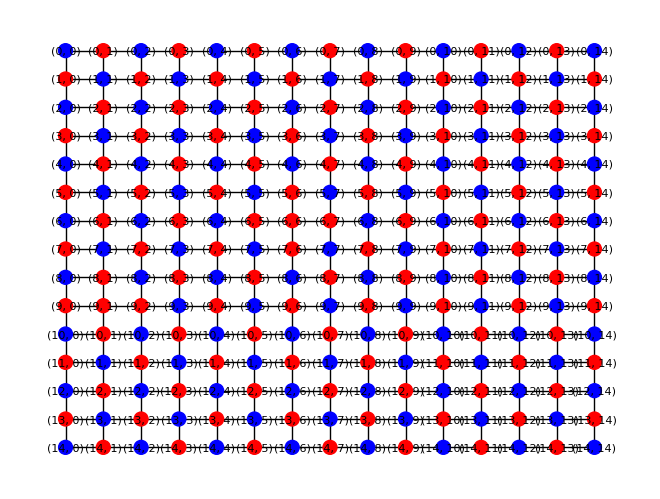

In [24]:

nx.draw(G, pos, with_labels=True, node_size=100, node_color=node_colors.values(), font_size=8)

In [30]:
M = nx.adjacency_matrix(graph)

/var/folders/36/skfz25cx6dgdl8sr9lbxm45h0000gs/T/ipykernel_33019/1712917341.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M = nx.adjacency_matrix(graph)


In [72]:
C6 = 5.42e6
a = 6.9
Delta = 2* np.pi * 10
energies = []
for sample in psi_samples.values:
    A = .5*C6/a**6 * np.array(M.todense())
    e = sample @ A @ sample.T - np.sum(sample) * Delta
    energies.append(e)

Text(0.5, 0, 'Energy')

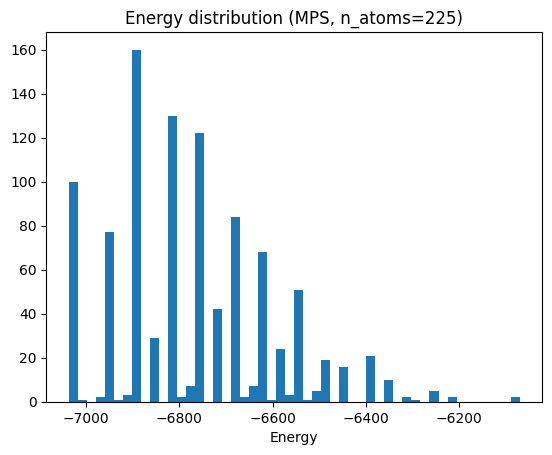

In [102]:
import matplotlib.pyplot as plt
plt.hist(energies, bins=50);
plt.title("Energy distribution (MPS, n_atoms=225)")
plt.xlabel("Energy")

## Honeycomb lattice

In [97]:
G = nx.triangular_lattice_graph(14, 14)

In [110]:
psi_samples = pd.read_csv("../2d_mps/experiment_n_121_bdim_16/mps_samples.csv")

In [100]:
trian_latt = pd.read_csv("./triang_latt.csv")

In [112]:
sample = psi_samples.values[0]

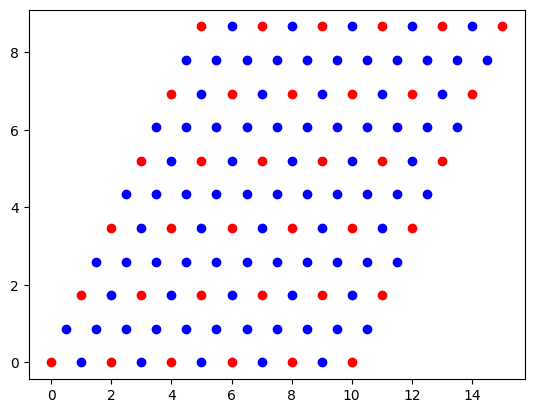

In [117]:
import seaborn as sns
plt.plot(trian_latt.values[sample == 0, 0], trian_latt.values[sample == 0, 1], 'o', c='r')
plt.plot(trian_latt.values[sample == 1, 0], trian_latt.values[sample == 1, 1], 'o', c='b')

In [118]:
sample

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [119]:
trian_latt.values

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [ 3.        ,  0.        ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  0.        ],
       [ 7.        ,  0.        ],
       [ 8.        ,  0.        ],
       [ 9.        ,  0.        ],
       [10.        ,  0.        ],
       [ 0.5       ,  0.8660254 ],
       [ 1.5       ,  0.8660254 ],
       [ 2.5       ,  0.8660254 ],
       [ 3.5       ,  0.8660254 ],
       [ 4.5       ,  0.8660254 ],
       [ 5.5       ,  0.8660254 ],
       [ 6.5       ,  0.8660254 ],
       [ 7.5       ,  0.8660254 ],
       [ 8.5       ,  0.8660254 ],
       [ 9.5       ,  0.8660254 ],
       [10.5       ,  0.8660254 ],
       [ 1.        ,  1.73205081],
       [ 2.        ,  1.73205081],
       [ 3.        ,  1.73205081],
       [ 4.        ,  1.73205081],
       [ 5.        ,  1.73205081],
       [ 6.        ,  1.73205081],
       [ 7.        ,

## Pruned lattice

In [291]:
n = 38
p = 0.2
bdim = 16

dir_name = f"../2d_mps/experiment_n_{n}_bdim_{bdim}_p_{p}"
psi_samples = pd.read_csv(f"{dir_name}/mps_samples.csv")
coords = pd.read_csv(f"{dir_name}/atom_coordinates.csv")
filling = pd.read_csv(f"{dir_name}/filling.csv")
density = pd.read_csv(f"{dir_name}/mpo_dynamics.csv")


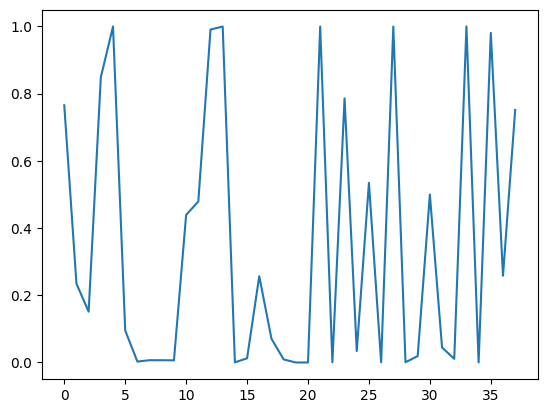

In [292]:
plt.plot(density.values[-1])

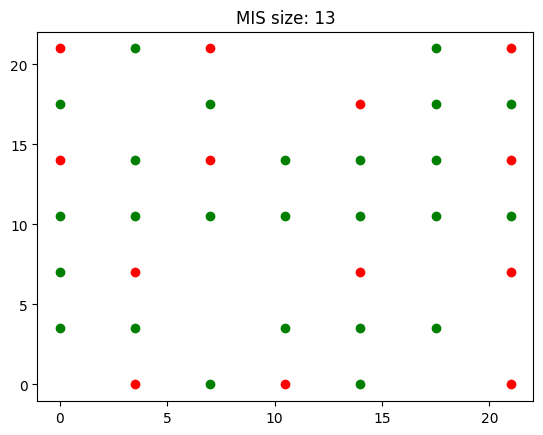

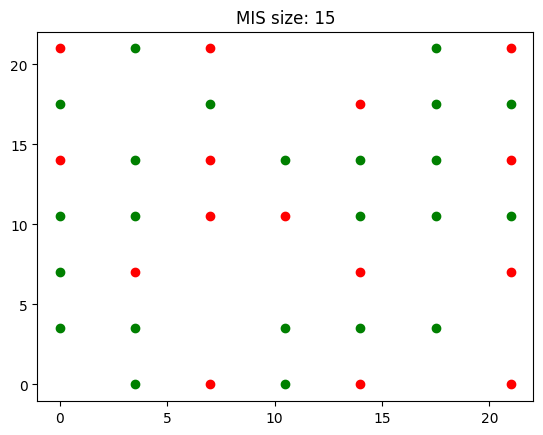

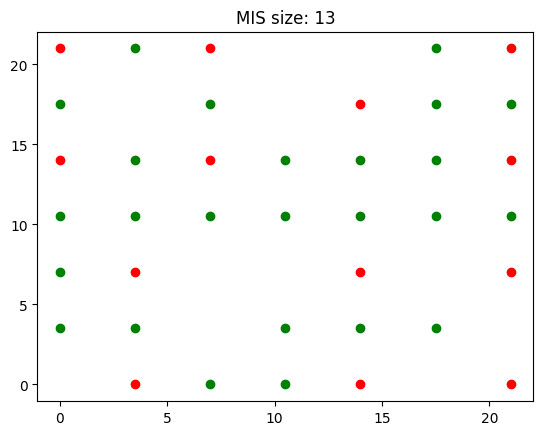

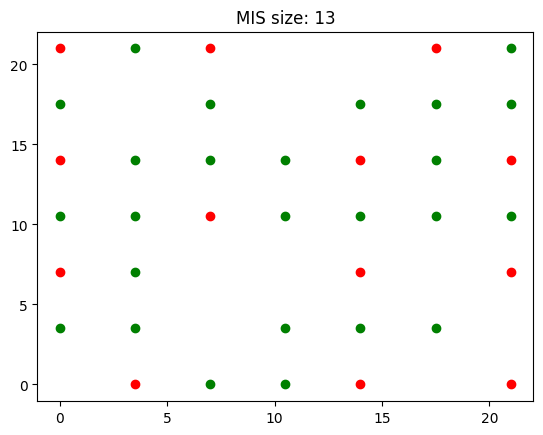

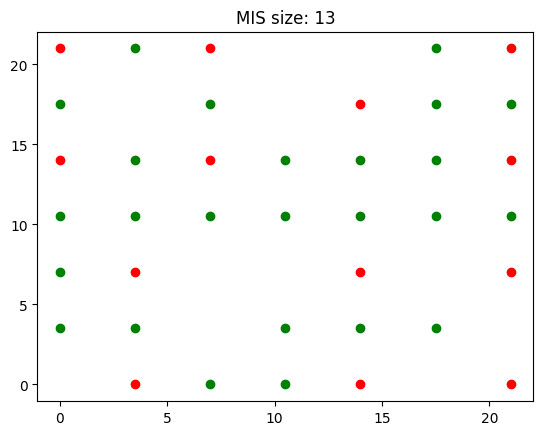

In [293]:
for sample in psi_samples.values[:5]:
    # sample = psi_samples.values[0]
    plt.plot(coords.T.values[sample == 0, 0], coords.T.values[sample == 0, 1], 'o', c='g')
    plt.plot(coords.T.values[sample == 1, 0], coords.T.values[sample == 1, 1], 'o', c='r')
    plt.title(f"MIS size: {sum(sample)}")
    plt.show()

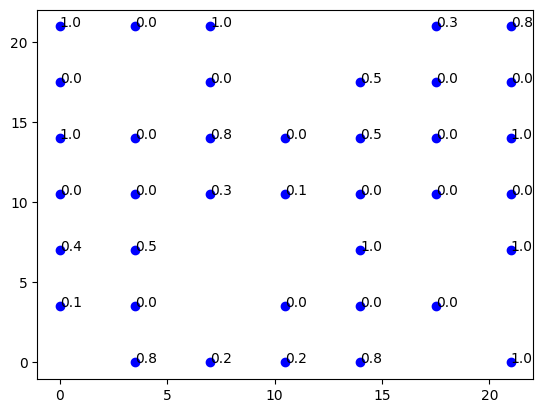

In [294]:
vals = coords.T.values
plt.plot(vals[:, 0], vals[:, 1], 'o', c='b')

for i, txt in enumerate(density.values[-1]):
    plt.annotate(round(txt, 1), (vals[i, 0], vals[i, 1]))

Text(0.5, 1.0, 'MIS size')

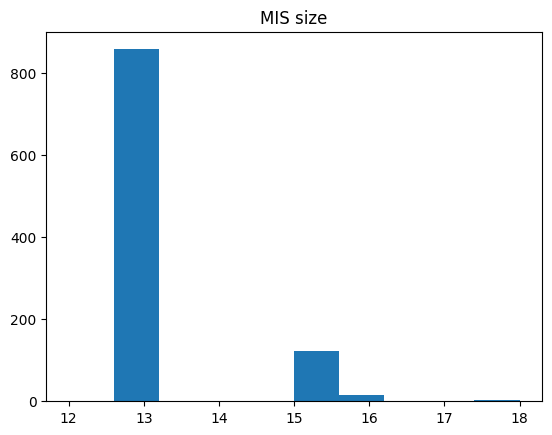

In [296]:
plt.hist(psi_samples.values.sum(axis=1));
plt.title("MIS size")

<AxesSubplot: >

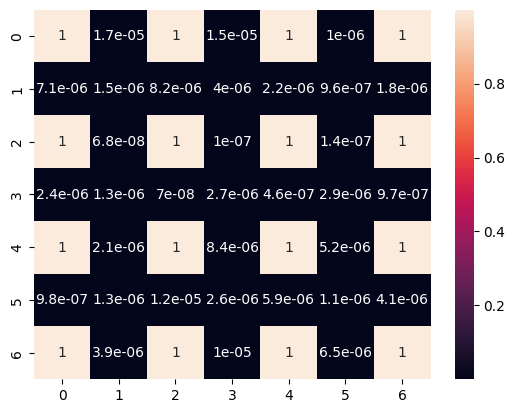

In [248]:
sns.heatmap(density.values[-1].reshape(7,7), annot=True)

In [192]:
C6 = 5.42e6 
detuning_max = 2*np.pi * 10
a_b = (C6/detuning_max)**(1./6)

In [193]:
a_b

6.647166690743382

In [225]:
4. * np.sqrt(2)

5.656854249492381

In [273]:
rows = 7  # Number of rows
cols = 7  # Number of columns

# Create a grid graph for the square lattice
G = nx.grid_2d_graph(rows, cols)

# Add diagonal edges to connect nodes diagonally
for i in range(rows):
    for j in range(cols):
        if i < rows - 1 and j < cols - 1:
            G.add_edge((i, j), (i + 1, j + 1))  # Diagonal connection from top-left to bottom-right
        if i < rows - 1 and j > 0:
            G.add_edge((i, j), (i + 1, j - 1))  # Diagonal connection from top-right to bottom-left
G = nx.convert_node_labels_to_integers(G)

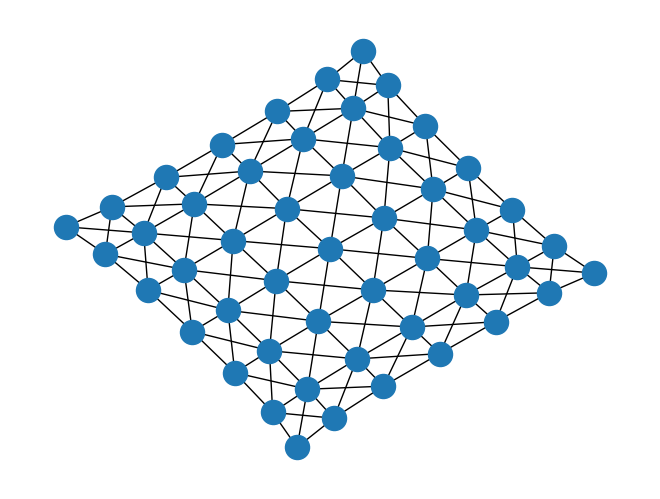

In [274]:
nx.draw(G)

In [276]:
nodes_to_delete = np.where(filling.values == 0)[1]

G.remove_nodes_from(nodes_to_delete)

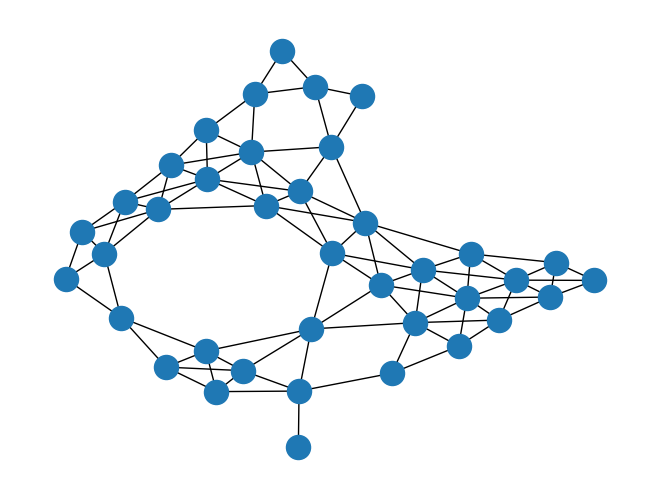

In [277]:
nx.draw(G)

In [278]:
from networkx.algorithms import approximation as approx

In [279]:
I = approx.maximum_independent_set(G)

In [280]:
I

{1, 3, 6, 14, 18, 20, 23, 28, 32, 34, 37, 42, 48}

In [281]:
len(I)

13